In [158]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set()
path = 'Cab_Data.csv'
Cabdata = pd.read_csv(path)

In [159]:
#Let's peek at the first 10 records of the Cab_Data dataset
Cabdata.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


Time Analysis - conversion of time unit

In [160]:
from datetime import datetime, timedelta

In [161]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [162]:
Cabdata['Date of Travel']=Cabdata['Date of Travel'].apply(lambda x:to_date_format(x))

In [163]:
#convert datetime column to just date
Cabdata=Cabdata.sort_values(by=['Date of Travel'])
Cabdata=Cabdata.reset_index(drop= True )

print('Filas =',Cabdata.shape[0], '  y   Columnas = ', Cabdata.shape[1])

Filas = 359392   y   Columnas =  7


In [164]:
Cabdata['Year of Travel'] = Cabdata['Date of Travel'].dt.year
Cabdata['Month of Travel'] = Cabdata['Date of Travel'].dt.month
Cabdata['Day of Travel '] = Cabdata['Date of Travel'].dt.day

In [165]:
Cabdata.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Day of Travel
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,2016,1,1
1,10000640,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,2016,1,1
2,10000635,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752,2016,1,1
3,10001001,2016-01-01,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960,2016,1,1
4,10000171,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,2016,1,1
5,10001009,2016-01-01,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.2000,2016,1,1
6,10000605,2016-01-01,Yellow Cab,CHICAGO IL,35.52,760.86,430.5024,2016,1,1
7,10001014,2016-01-01,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.2000,2016,1,1
8,10000600,2016-01-01,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000,2016,1,1
9,10000182,2016-01-01,Pink Cab,SAN DIEGO CA,2.36,47.89,23.6000,2016,1,1


In [166]:
# What is the shape of the data?
Cabdata.shape

(359392, 10)

In [167]:
#Let's peek at the information regarding the features.
Cabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Transaction ID   359392 non-null  int64         
 1   Date of Travel   359392 non-null  datetime64[ns]
 2   Company          359392 non-null  object        
 3   City             359392 non-null  object        
 4   KM Travelled     359392 non-null  float64       
 5   Price Charged    359392 non-null  float64       
 6   Cost of Trip     359392 non-null  float64       
 7   Year of Travel   359392 non-null  int64         
 8   Month of Travel  359392 non-null  int64         
 9   Day of Travel    359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 27.4+ MB


In [168]:
# Let's check if we have missing values
Cabdata.isnull().sum()

Transaction ID     0
Date of Travel     0
Company            0
City               0
KM Travelled       0
Price Charged      0
Cost of Trip       0
Year of Travel     0
Month of Travel    0
Day of Travel      0
dtype: int64

In [169]:
Cabdata['City'].unique()

array(['WASHINGTON DC', 'CHICAGO IL', 'NEW YORK NY', 'SAN DIEGO CA',
       'PHOENIX AZ', 'SACRAMENTO CA', 'SEATTLE WA', 'LOS ANGELES CA',
       'MIAMI FL', 'DENVER CO', 'DALLAS TX', 'BOSTON MA', 'ATLANTA GA',
       'TUCSON AZ', 'SILICON VALLEY', 'NASHVILLE TN', 'ORANGE COUNTY',
       'AUSTIN TX', 'PITTSBURGH PA'], dtype=object)

In [170]:
Cabdata['Company'].unique()

array(['Yellow Cab', 'Pink Cab'], dtype=object)

Text(0.5, 0, 'Company')

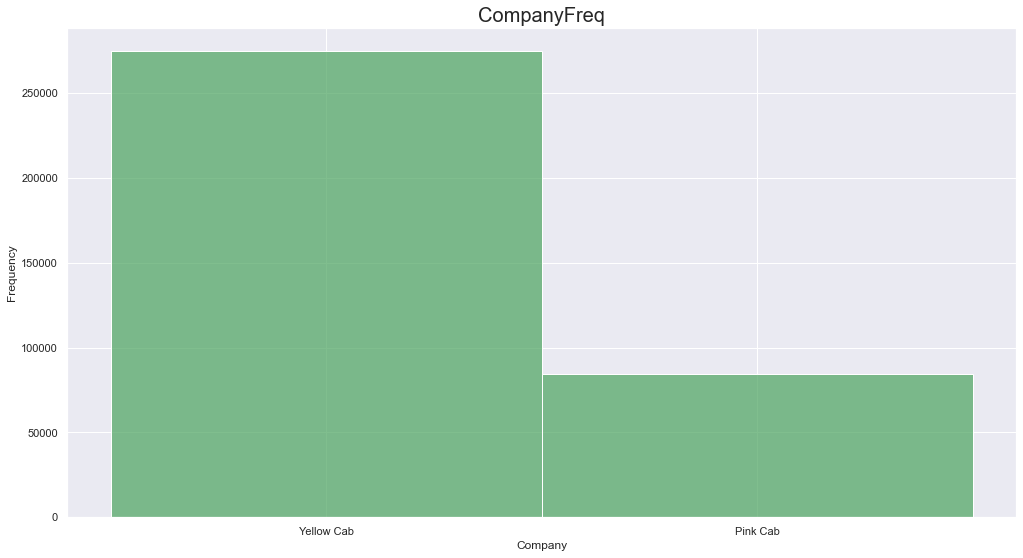

In [171]:
plt.figure(figsize=(17,9))
ax=sns.histplot(data=Cabdata, x="Company",bins=40, color= 'g')
plt.title('CompanyFreq', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Company')

In [180]:
path = 'City.csv'
Citydata = pd.read_csv(path)

In [181]:
#Let's peek at the first 10 records of the City dataset
Citydata.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [182]:
# What is the shape of the data?
Citydata.shape

(20, 3)

In [183]:
#Let's peek at the information regarding the features.
Citydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [184]:
Citydata['Population'] = [x.replace(',','') for x in Citydata['Population']]
Citydata['Users'] = [x.replace(',','') for x in Citydata['Users']]
Citydata['Population'] = Citydata['Population'].astype(float)
Citydata['Users'] = Citydata['Users'].astype(float)
Citydata.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [185]:
# Let's check if we have missing values
Citydata.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [186]:
Citydata['City'].unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

Text(0.5, 0, 'Users')

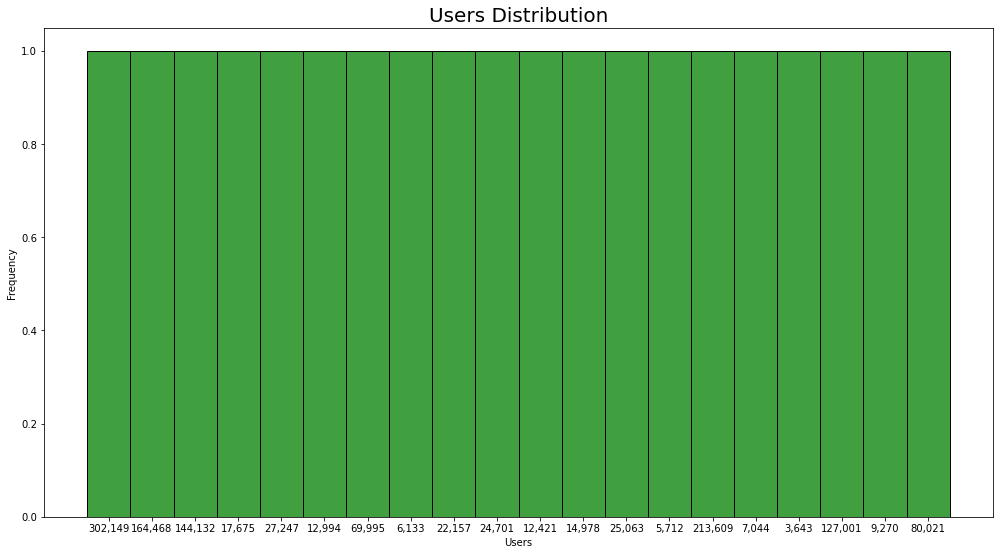

In [34]:
plt.figure(figsize=(17,9))
ax=sns.histplot(data=Citydata, x="Users",bins=40, color= 'g')
plt.title('Users Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Users')

In [187]:
path = 'Customer_ID.csv'#'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
Customer_IDdata = pd.read_csv(path)

In [188]:
#Let's peek at the first 10 records of the Cab_Data dataset
Customer_IDdata.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [189]:
# What is the shape of the data?
Customer_IDdata.shape

(49171, 4)

In [190]:
#Let's peek at the information regarding the wine features.
Customer_IDdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [191]:

Customer_IDdata['Income (USD/Month)'] = Customer_IDdata['Income (USD/Month)'].astype(float)
Customer_IDdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         49171 non-null  int64  
 1   Gender              49171 non-null  object 
 2   Age                 49171 non-null  int64  
 3   Income (USD/Month)  49171 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ MB


In [192]:
# Let's check if we have missing values
Customer_IDdata.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [193]:
Customer_IDdata['Customer ID'].unique()

array([29290, 27703, 28712, ..., 41414, 41677, 39761], dtype=int64)

Text(0.5, 0, 'Gender')

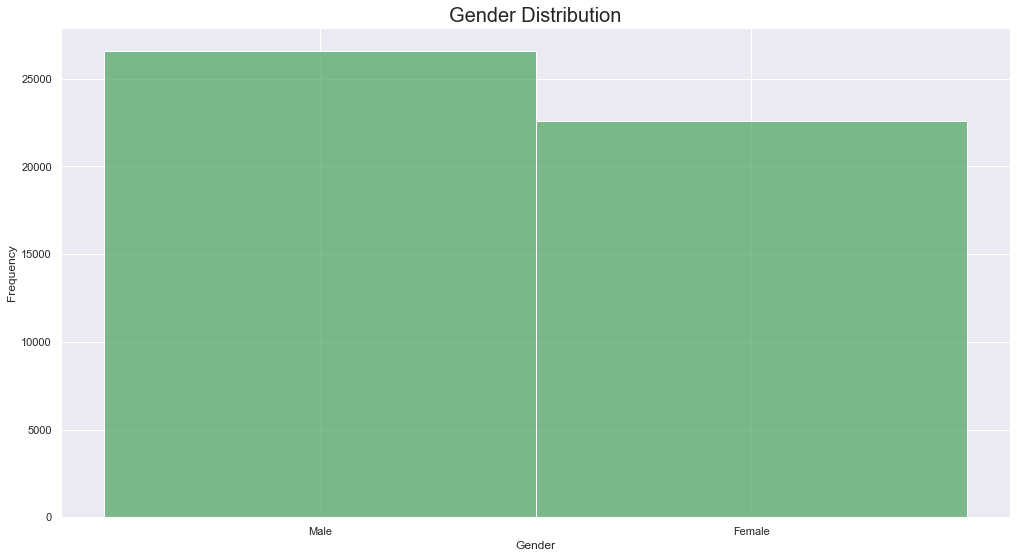

In [194]:
plt.figure(figsize=(17,9))
ax=sns.histplot(data=Customer_IDdata, x="Gender",bins=40, color= 'g')
plt.title('Gender Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Gender')

In [195]:
path = 'Transaction_ID.csv'#'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
Transaction_IDdata = pd.read_csv(path)

In [196]:
#Let's peek at the first 10 records of the Cab_Data dataset
Transaction_IDdata.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [197]:
# What is the shape of the data?
Transaction_IDdata.shape

(440098, 3)

In [198]:
#Let's peek at the information regarding the wine features.
Transaction_IDdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [199]:
# Let's check if we have missing values
Transaction_IDdata.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

Text(0.5, 0, 'Payment_Mode')

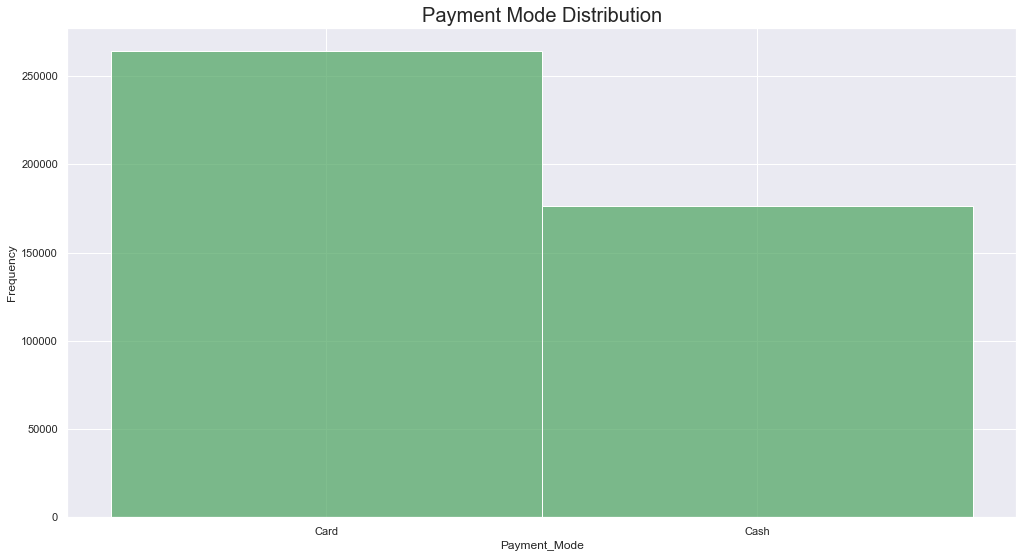

In [200]:
plt.figure(figsize=(17,9))
ax=sns.histplot(data=Transaction_IDdata, x="Payment_Mode",bins=40, color= 'g')
plt.title('Payment Mode Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Payment_Mode')

In [201]:
masterdata = Cabdata.merge(Transaction_IDdata, on= 'Transaction ID').merge(Customer_IDdata, on ='Customer ID').merge(Citydata, on = 'City')

In [202]:
#Let's peek at the first 10 records of the Cab_Data dataset
masterdata.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Day of Travel,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,2016,1,1,52536,Card,Male,24,10606.0,418859.0,127001.0
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,2016,3,25,52536,Cash,Male,24,10606.0,418859.0,127001.0
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,2016,11,8,52536,Cash,Male,24,10606.0,418859.0,127001.0
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,2017,4,16,52536,Card,Male,24,10606.0,418859.0,127001.0
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,2017,6,23,52536,Cash,Male,24,10606.0,418859.0,127001.0
5,10249981,2017-10-30,Pink Cab,WASHINGTON DC,28.00,424.20,280.0000,2017,10,30,52536,Card,Male,24,10606.0,418859.0,127001.0
6,10261473,2017-11-16,Yellow Cab,WASHINGTON DC,11.60,180.50,144.7680,2017,11,16,52536,Cash,Male,24,10606.0,418859.0,127001.0
7,10270018,2017-11-29,Yellow Cab,WASHINGTON DC,6.06,84.71,81.4464,2017,11,29,52536,Cash,Male,24,10606.0,418859.0,127001.0
8,10317783,2018-04-07,Yellow Cab,WASHINGTON DC,33.25,556.72,426.9300,2018,4,7,52536,Card,Male,24,10606.0,418859.0,127001.0
9,10326349,2018-05-01,Yellow Cab,WASHINGTON DC,23.75,448.80,342.0000,2018,5,1,52536,Card,Male,24,10606.0,418859.0,127001.0


In [203]:
# What is the shape of the data?
masterdata.shape

(359392, 17)

In [204]:
#Let's peek at the information regarding the wine features.
masterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Year of Travel      359392 non-null  int64         
 8   Month of Travel     359392 non-null  int64         
 9   Day of Travel       359392 non-null  int64         
 10  Customer ID         359392 non-null  int64         
 11  Payment_Mode        359392 non-null  object        
 12  Gender              359392 non-null  object        
 13  Age                 359392 no

In [205]:
masterdata['Income (USD/Month)'] = masterdata['Income (USD/Month)'].astype(float)
masterdata['Population'] = masterdata['Population'].astype(int)
masterdata['Users'] = masterdata['Users'].astype(int)
masterdata.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Year of Travel                 int64
Month of Travel                int64
Day of Travel                  int64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)           float64
Population                     int32
Users                          int32
dtype: object

In [206]:
# Let's check if we have missing values
masterdata.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Year of Travel        0
Month of Travel       0
Day of Travel         0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [207]:
duplicated_rows = masterdata[masterdata.duplicated()]
print('The number of duplicated rows = ', duplicated_rows.shape[0])

The number of duplicated rows =  0


In [208]:
round(masterdata.describe(include='all'),2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Day of Travel,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
count,359392.00,359392,359392,359392,359392.00,359392.00,359392.00,359392.00,359392.00,359392.00,359392.00,359392,359392,359392.00,359392.00,359392.00,359392.00
unique,NaN,1095,2,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,NaN,2018-01-04 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Card,Male,NaN,NaN,NaN,NaN
freq,NaN,2022,274681,99885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215504,205912,NaN,NaN,NaN,NaN
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10220761.19,NaN,NaN,NaN,22.57,423.44,286.19,2017.04,7.51,15.64,19191.65,NaN,NaN,35.34,15048.82,3132198.04,158365.58
std,126805.80,NaN,NaN,NaN,12.23,274.38,157.99,0.80,3.43,8.84,21012.41,NaN,NaN,12.59,7969.41,3315194.39,100850.05
min,10000011.00,NaN,NaN,NaN,1.90,15.60,19.00,2016.00,1.00,1.00,1.00,NaN,NaN,18.00,2000.00,248968.00,3643.00
25%,10110809.75,NaN,NaN,NaN,12.00,206.44,151.20,2016.00,5.00,8.00,2705.00,NaN,NaN,25.00,8424.00,671238.00,80021.00


Text(0.5, 0, 'Km Travelled')

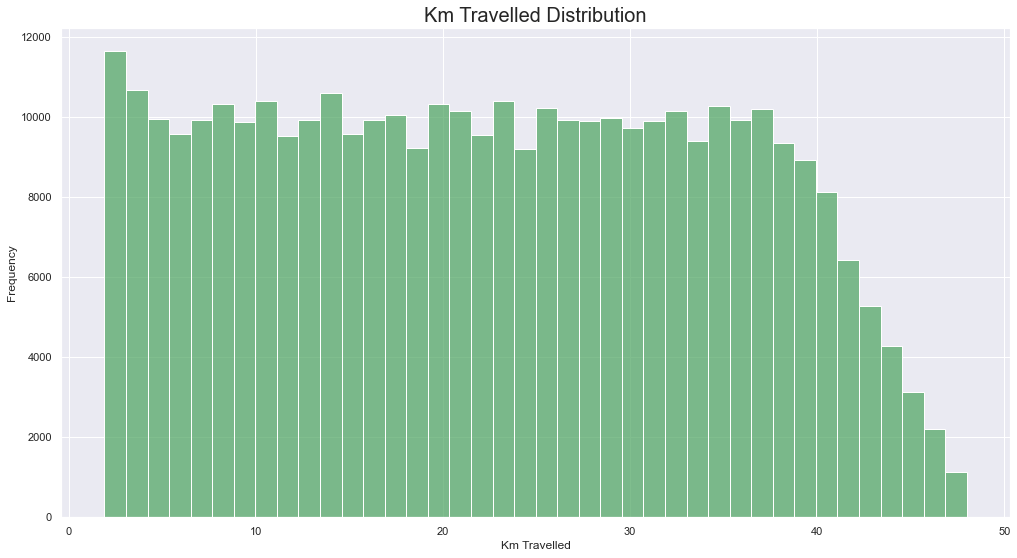

In [209]:
plt.figure(figsize=(17,9))
ax=sns.histplot(data=masterdata, x="KM Travelled",bins=40, color= 'g')
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')

Text(0.5, 0, 'Price Charged')

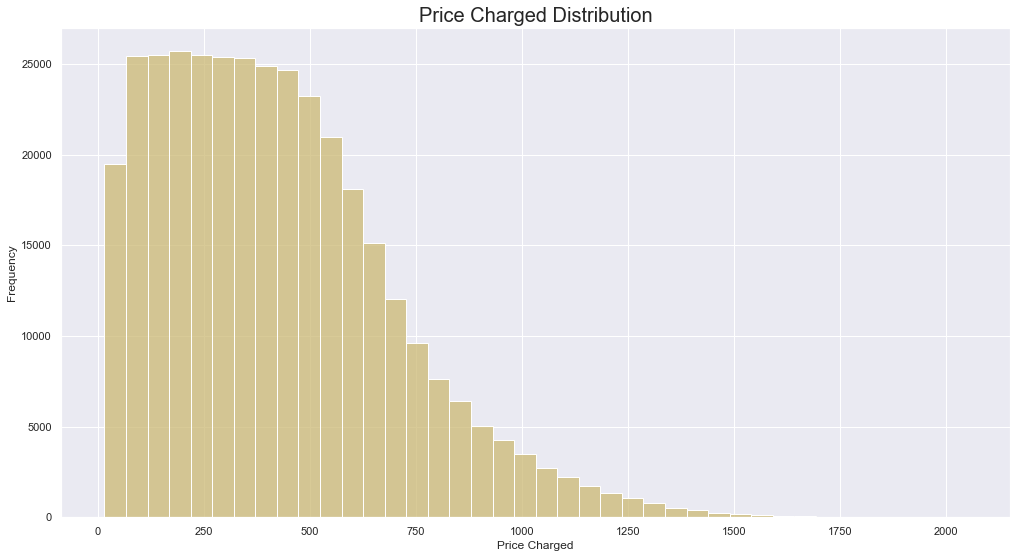

In [210]:
plt.figure(figsize=(17,9))
sns.histplot(data=masterdata, x="Price Charged",bins=40 , color= 'y')
plt.title('Price Charged Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Price Charged')

Text(0.5, 0, 'Cost of Trip')

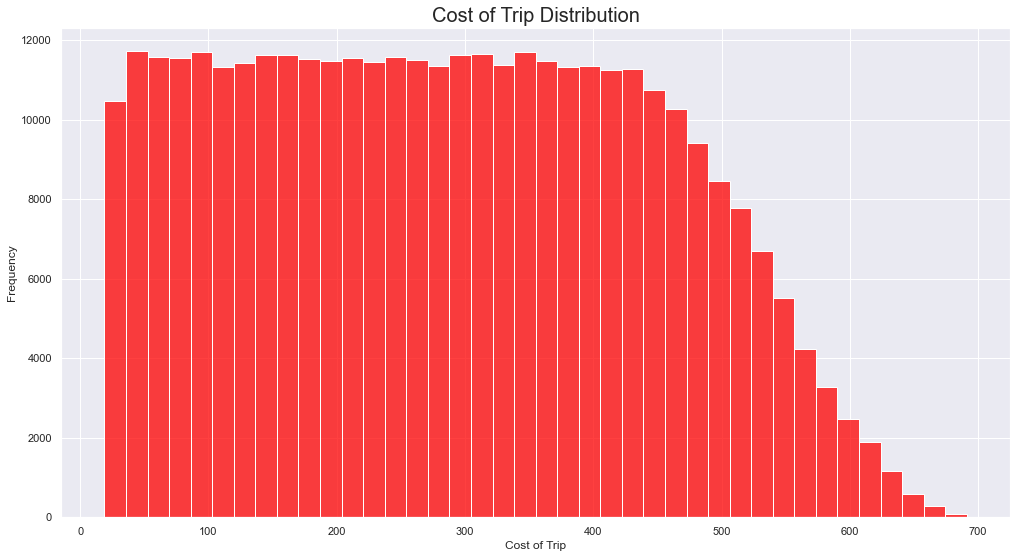

In [211]:
plt.figure(figsize=(17,9))
sns.histplot(data= masterdata,x="Cost of Trip",bins=40 , color= 'red')
plt.title('Cost of Trip Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Cost of Trip')

Text(0.5, 0, 'Age')

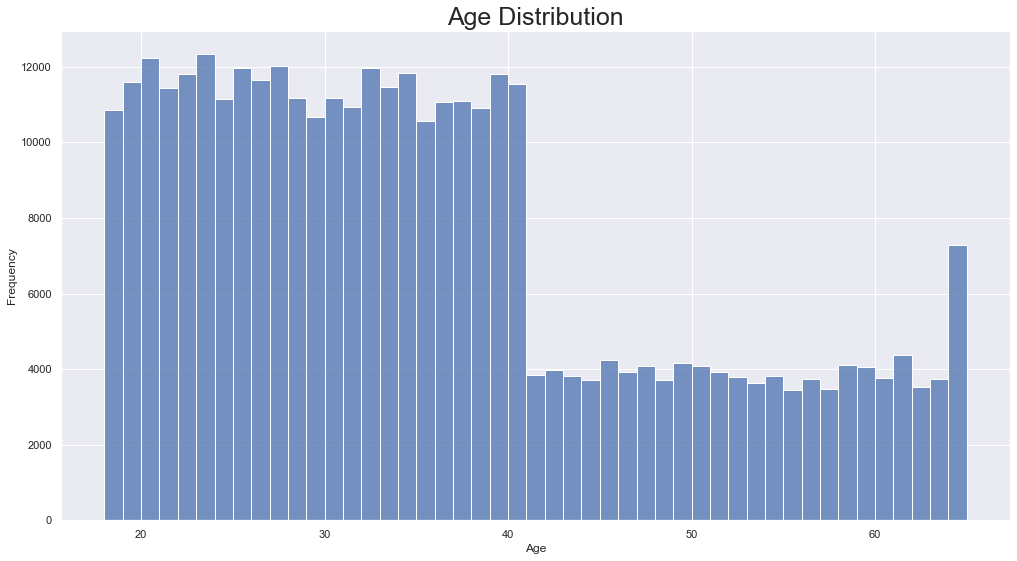

In [212]:
plt.figure(figsize=(17,9))
sns.histplot(data=masterdata, x='Age', bins=47)
plt.title('Age Distribution', fontsize=25)
plt.ylabel('Frequency')
plt.xlabel('Age')

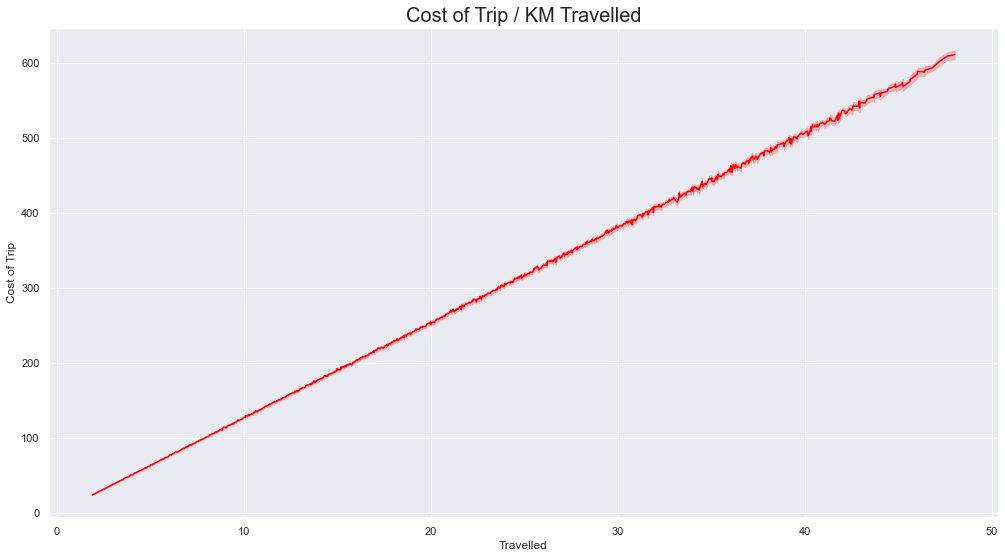

In [213]:
plt.figure(figsize=(17,9))
sns.lineplot(data=masterdata, x="KM Travelled",y='Cost of Trip', color= 'red')
plt.title('Cost of Trip / KM Travelled', fontsize=20)
plt.xlabel('Travelled')
plt.ylabel('Cost of Trip')
plt.show()

In [214]:
masterdata.corr()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Day of Travel,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,0.941475,0.284724,0.014824,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,-0.001094,-0.001773,0.000767,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.036903,-0.059639,-0.006820,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,-0.001766,-0.008309,0.000726,0.003077,-0.000189,-0.000633,0.015108,0.023628
Year of Travel,0.941475,-0.001094,-0.036903,-0.001766,1.000000,-0.033169,-0.022449,-0.002480,-0.000497,-0.001679,0.000061,-0.000556
Month of Travel,0.284724,-0.001773,-0.059639,-0.008309,-0.033169,1.000000,0.055164,-0.045030,-0.002376,0.000585,0.064827,0.036285
Day of Travel,0.014824,0.000767,-0.006820,0.000726,-0.022449,0.055164,1.000000,0.000763,-0.002291,0.000927,-0.000396,-0.001356
Customer ID,-0.016912,0.000389,-0.177324,0.003077,-0.002480,-0.045030,0.000763,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.000497,-0.002376,-0.002291,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.001679,0.000585,0.000927,-0.013608,0.003907,1.000000,0.011868,0.010464


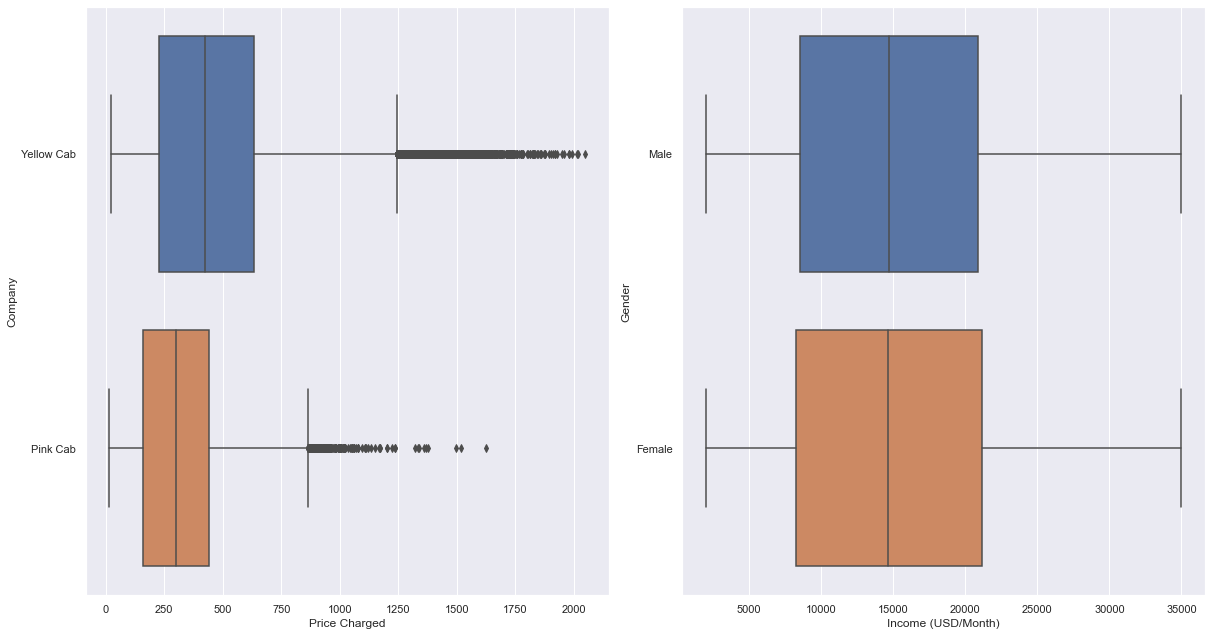

In [215]:
plt.figure(figsize=(17,9))

plt.subplot(1,2,1)
sns.boxplot(data = masterdata, y = 'Company', x = "Price Charged", dodge=False)

plt.subplot(1,2,2)
sns.boxplot(data = masterdata, y = 'Gender', x = "Income (USD/Month)", dodge=False)

plt.tight_layout()
plt.show()

In [221]:
masterdata['Profit'] = masterdata['Price Charged'] -masterdata['Cost of Trip']

In [222]:
masterdata.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Day of Travel,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,2016,1,1,52536,Card,Male,24,10606.0,418859,127001,66.6760
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,2016,3,25,52536,Cash,Male,24,10606.0,418859,127001,14.3688
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,2016,11,8,52536,Cash,Male,24,10606.0,418859,127001,25.7090
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,2017,4,16,52536,Card,Male,24,10606.0,418859,127001,18.4932
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,2017,6,23,52536,Cash,Male,24,10606.0,418859,127001,114.8280
5,10249981,2017-10-30,Pink Cab,WASHINGTON DC,28.00,424.20,280.0000,2017,10,30,52536,Card,Male,24,10606.0,418859,127001,144.2000
6,10261473,2017-11-16,Yellow Cab,WASHINGTON DC,11.60,180.50,144.7680,2017,11,16,52536,Cash,Male,24,10606.0,418859,127001,35.7320
7,10270018,2017-11-29,Yellow Cab,WASHINGTON DC,6.06,84.71,81.4464,2017,11,29,52536,Cash,Male,24,10606.0,418859,127001,3.2636
8,10317783,2018-04-07,Yellow Cab,WASHINGTON DC,33.25,556.72,426.9300,2018,4,7,52536,Card,Male,24,10606.0,418859,127001,129.7900
9,10326349,2018-05-01,Yellow Cab,WASHINGTON DC,23.75,448.80,342.0000,2018,5,1,52536,Card,Male,24,10606.0,418859,127001,106.8000


In [223]:
masterdata.shape

(359392, 18)

In [224]:
masterdata.corr()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Day of Travel,Customer ID,Age,Income (USD/Month),Population,Users,Profit
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,0.941475,0.284724,0.014824,-0.016912,-0.001267,-0.001570,0.023868,0.013526,-0.087130
KM Travelled,-0.001429,1.000000,0.835753,0.981848,-0.001094,-0.001773,0.000767,0.000389,-0.000369,-0.000544,-0.002311,-0.000428,0.462768
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.036903,-0.059639,-0.006820,-0.177324,-0.003084,0.003228,0.326589,0.281061,0.864154
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,-0.001766,-0.008309,0.000726,0.003077,-0.000189,-0.000633,0.015108,0.023628,0.486056
Year of Travel,0.941475,-0.001094,-0.036903,-0.001766,1.000000,-0.033169,-0.022449,-0.002480,-0.000497,-0.001679,0.000061,-0.000556,-0.061420
Month of Travel,0.284724,-0.001773,-0.059639,-0.008309,-0.033169,1.000000,0.055164,-0.045030,-0.002376,0.000585,0.064827,0.036285,-0.093886
Day of Travel,0.014824,0.000767,-0.006820,0.000726,-0.022449,0.055164,1.000000,0.000763,-0.002291,0.000927,-0.000396,-0.001356,-0.012388
Customer ID,-0.016912,0.000389,-0.177324,0.003077,-0.002480,-0.045030,0.000763,1.000000,-0.004735,-0.013608,-0.647052,-0.610742,-0.306527
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.000497,-0.002376,-0.002291,-0.004735,1.000000,0.003907,-0.009002,-0.005906,-0.005093
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.001679,0.000585,0.000927,-0.013608,0.003907,1.000000,0.011868,0.010464,0.006148


In [225]:
masterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Year of Travel      359392 non-null  int64         
 8   Month of Travel     359392 non-null  int64         
 9   Day of Travel       359392 non-null  int64         
 10  Customer ID         359392 non-null  int64         
 11  Payment_Mode        359392 non-null  object        
 12  Gender              359392 non-null  object        
 13  Age                 359392 no

In [226]:
masterdata_travel=masterdata.set_index('Date of Travel')

In [227]:
masterdata_travel.sort_values('Date of Travel').head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Day of Travel,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
Date of Travel,,,,,,,,,,,,,,,,,
2016-01-01,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,2016,1,1,52536,Card,Male,24,10606.0,418859,127001,66.6760
2016-01-01,10001254,Yellow Cab,SILICON VALLEY,42.12,1342.05,520.6032,2016,1,1,13894,Card,Male,32,21898.0,1177609,27247,821.4468
2016-01-01,10001242,Yellow Cab,SILICON VALLEY,18.02,658.65,240.0264,2016,1,1,14513,Card,Male,62,3892.0,1177609,27247,418.6236
2016-01-01,10000885,Yellow Cab,NEW YORK NY,32.20,940.73,452.0880,2016,1,1,1698,Card,Male,23,22120.0,8405837,302149,488.6420
2016-01-01,10000961,Yellow Cab,NEW YORK NY,19.04,634.46,253.6128,2016,1,1,85,Card,Male,19,19765.0,8405837,302149,380.8472


In [228]:
yellowcabtravel= masterdata_travel[masterdata_travel.Company.isin(['Yellow Cab'])]
print(yellowcabtravel.shape)
yellowcab= masterdata[masterdata.Company.isin(['Yellow Cab'])]
print(yellowcab.shape)
yellowcab.head()
yellowcabtravel.head()

(274681, 17)
(274681, 18)


,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Day of Travel,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
Date of Travel,,,,,,,,,,,,,,,,,
2016-01-01,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,2016,1,1,52536,Card,Male,24,10606.0,418859,127001,66.6760
2016-03-25,10020018,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,2016,3,25,52536,Cash,Male,24,10606.0,418859,127001,14.3688
2017-04-16,10164725,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,2017,4,16,52536,Card,Male,24,10606.0,418859,127001,18.4932
2017-06-23,10188478,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,2017,6,23,52536,Cash,Male,24,10606.0,418859,127001,114.8280
2017-11-16,10261473,Yellow Cab,WASHINGTON DC,11.60,180.50,144.7680,2017,11,16,52536,Cash,Male,24,10606.0,418859,127001,35.7320


In [229]:
pinkcabtravel= masterdata_travel[masterdata_travel.Company.isin(['Pink Cab'])]
print(pinkcabtravel.shape)
pinkcab= masterdata[masterdata.Company.isin(['Pink Cab'])]
print(pinkcab.shape)
pinkcab.head()
pinkcabtravel.head()

(84711, 17)
(84711, 18)


,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Day of Travel,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
Date of Travel,,,,,,,,,,,,,,,,,
2016-11-08,10102932,Pink Cab,WASHINGTON DC,15.21,179.33,153.621,2016,11,8,52536,Cash,Male,24,10606.0,418859,127001,25.709
2017-10-30,10249981,Pink Cab,WASHINGTON DC,28.00,424.20,280.000,2017,10,30,52536,Card,Male,24,10606.0,418859,127001,144.200
2017-10-19,10242139,Pink Cab,WASHINGTON DC,26.78,371.96,313.326,2017,10,19,53683,Card,Male,26,9389.0,418859,127001,58.634
2017-02-10,10143658,Pink Cab,WASHINGTON DC,42.55,504.03,489.325,2017,2,10,53126,Cash,Male,24,3032.0,418859,127001,14.705
2016-12-20,10125156,Pink Cab,WASHINGTON DC,10.00,151.06,104.000,2016,12,20,51580,Card,Male,51,6115.0,418859,127001,47.060


In [232]:
# Count frequency value using GroupBy.size()
mcab = masterdata.groupby(['Company','Year of Travel'])['Profit'].sum().to_frame('Profit')

In [233]:
mcab.head()

Profit
Company    Year of Travel              
Pink Cab   2016            1.739883e+06
           2017            2.015101e+06
           2018            1.552345e+06
Yellow Cab 2016            1.407389e+07
           2017            1.646427e+07

In [234]:
mcity = masterdata.groupby(['Company','Year of Travel','City']).size()
print(mcity)

Company     Year of Travel  City          
Pink Cab    2016            ATLANTA GA          533
                            AUSTIN TX           544
                            BOSTON MA          1540
                            CHICAGO IL         2800
                            DALLAS TX           418
                                              ...  
Yellow Cab  2018            SAN DIEGO CA       3395
                            SEATTLE WA         1798
                            SILICON VALLEY     1650
                            TUCSON AZ           394
                            WASHINGTON DC     13794
Length: 114, dtype: int64


In [235]:
mcity.head()

Company   Year of Travel  City      
Pink Cab  2016            ATLANTA GA     533
                          AUSTIN TX      544
                          BOSTON MA     1540
                          CHICAGO IL    2800
                          DALLAS TX      418
dtype: int64

In [242]:
# Count frequency value using GroupBy.size()
mpop = masterdata.groupby(['Company','Year of Travel'])['Users'].sum().to_frame('Users')

In [243]:
mpop.head(10)

Users
Company    Year of Travel              
Pink Cab   2016            3.157130e+09
           2017            3.812655e+09
           2018            3.669139e+09
Yellow Cab 2016            1.394901e+10
           2017            1.653358e+10
           2018            1.579381e+10

In [93]:
mprice=masterdata.groupby(['Company', 'Year'])['Price Charged'].sum().to_frame('Price')

In [94]:
mprice.head()

Price
Company    Year              
Pink Cab   2016  7.986269e+06
           2017  9.530736e+06
           2018  8.811246e+06
Yellow Cab 2016  3.883363e+07
           2017  4.558291e+07

In [244]:
mprice['%Profit'] =(mcab['Profit']*100) /mprice['Price']

In [245]:
mprice.head()

Price    %Profit
Company    Year                         
Pink Cab   2016  7.986269e+06  21.785926
           2017  9.530736e+06  21.143179
           2018  8.811246e+06  17.617770
Yellow Cab 2016  3.883363e+07  36.241491
           2017  4.558291e+07  36.119383

In [246]:
y=yellowcabtravel.Profit.resample('Y').sum()
ypy= pd.DataFrame(y)
p=pinkcabtravel.Profit.resample('Y').sum()
ppy= pd.DataFrame(p)
print(ypy)
print(ppy)
y=yellowcabtravel.Profit.resample('m').sum()
ypm= pd.DataFrame(y)
p=pinkcabtravel.Profit.resample('m').sum()
ppm= pd.DataFrame(p)

                      Profit
Date of Travel              
2016-12-31      1.407389e+07
2017-12-31      1.646427e+07
2018-12-31      1.348222e+07
                     Profit
Date of Travel             
2016-12-31      1739882.628
2017-12-31      2015100.657
2018-12-31      1552345.036


YellowCab's profits over the last 3 years are eight times higher than PinkCab's Company

Before starting to plot, I retrive a function from www.it-swarm-es.com, so as to label bars easy

In [247]:
ypy['ProfitORides']= ypy['Profit']/yellowcab['Date of Travel'].value_counts().resample('Y').sum()
ppy['ProfitORides']= ppy['Profit']/pinkcab['Date of Travel'].value_counts().resample('Y').sum()
ypm['ProfitORides']= ypm['Profit']/yellowcab['Date of Travel'].value_counts().resample('m').sum()
ppm['ProfitORides']= ppm['Profit']/pinkcab['Date of Travel'].value_counts().resample('m').sum()
ypy['ProfitOKM']= ypy['Profit']/yellowcabtravel['KM Travelled'].resample('Y').sum()
ppy['ProfitOKM']= ppy['Profit']/pinkcabtravel['KM Travelled'].resample('Y').sum()
ypm['ProfitOKM']= ypm['Profit']/yellowcabtravel['KM Travelled'].resample('m').sum()
ppm['ProfitOKM']= ppm['Profit']/pinkcabtravel['KM Travelled'].resample('m').sum()

In [248]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'
 # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "${:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, fontsize=12)                      # Vertically align label differently for                                       # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

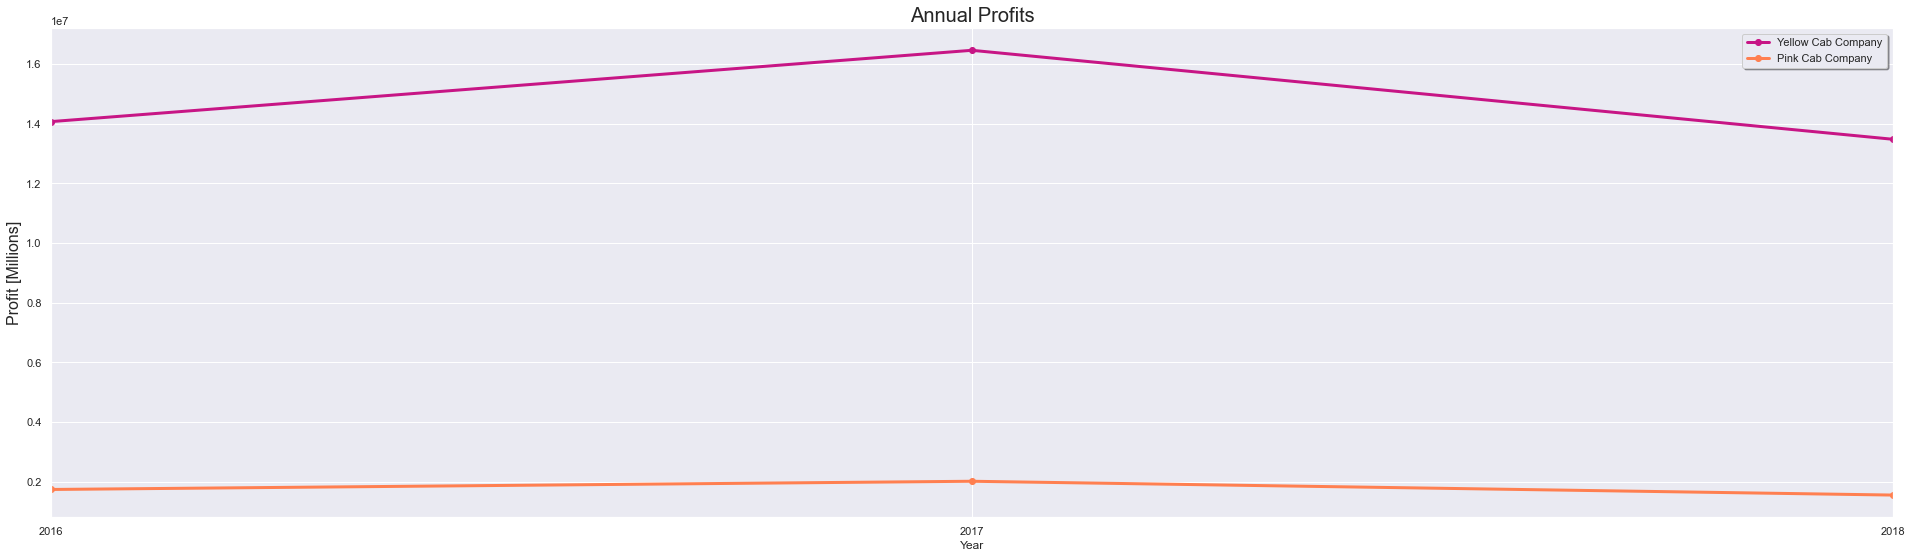

In [249]:
plt.figure(figsize=(33,9))

fig= yellowcabtravel.Profit.resample('Y').sum().plot.line(color = 'mediumvioletred',label='Yellow Cab Company',linewidth=3, marker='o')
fig=pinkcabtravel.Profit.resample('Y').sum().plot.line(color = 'coral',label='Pink Cab Company',linewidth=3, marker='o')
plt.ylabel('Profit [Millions]', fontsize=16)
plt.title('Annual Profits',fontsize=20)
plt.xlabel('Year')

plt.legend(loc='best', shadow=True)

Average profits per City

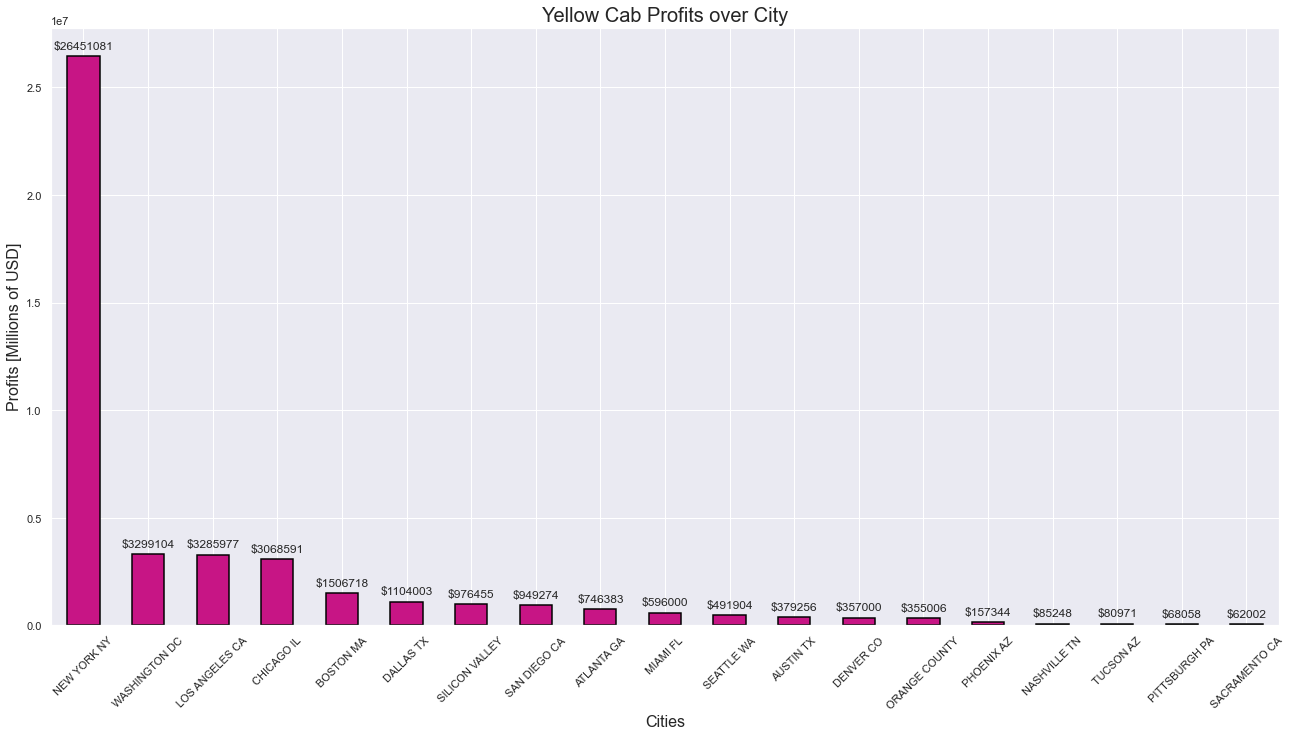

In [250]:
ppc= yellowcab.groupby('City').Profit.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Profit', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.Profit.plot.bar(color = 'mediumvioletred',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab Profits over City',fontsize=20)
add_value_labels(fig)


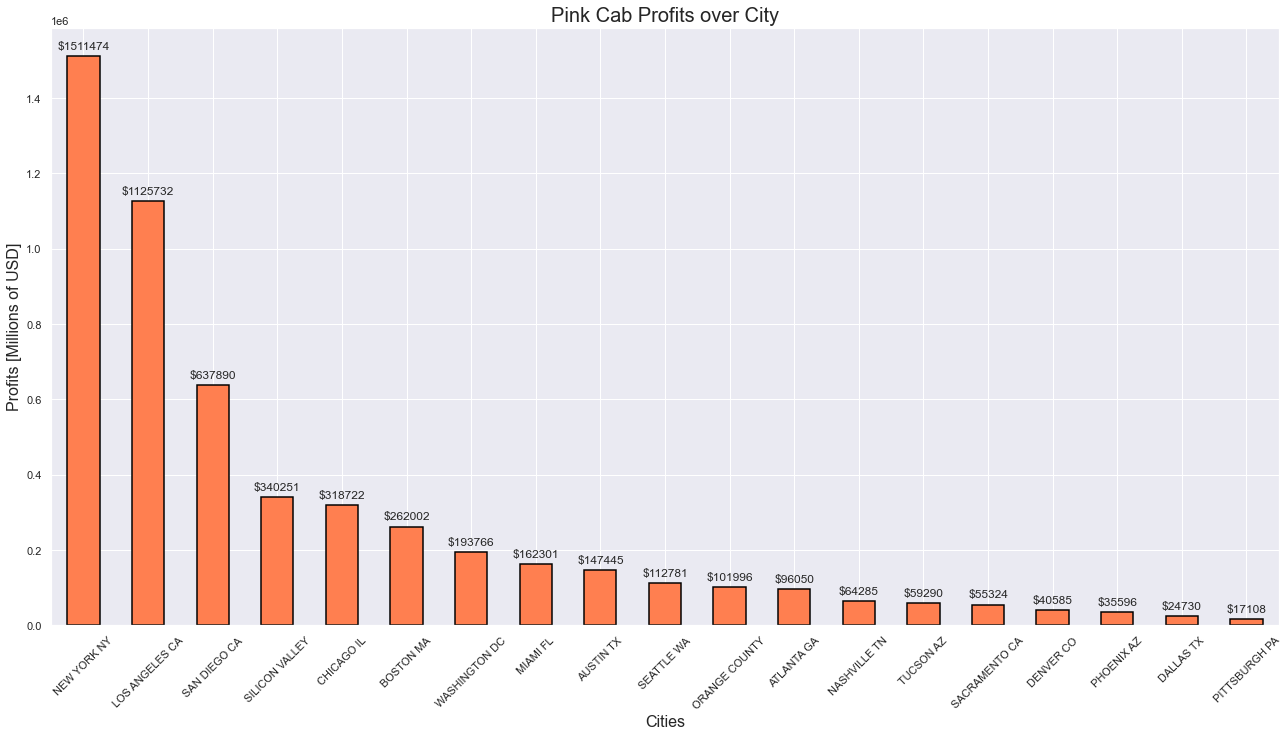

In [251]:
ppc= pinkcab.groupby('City').Profit.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Profit', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.Profit.plot.bar(color = 'coral',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Pink Cab Profits over City',fontsize=20)
add_value_labels(fig)

In [252]:
h=masterdata.groupby(['Company','City']).Profit.sum().to_frame('Profit Over City')
h=h.reset_index(level='City', col_level=1)
h=h.reset_index(level='Company', col_level=1)
h = h.sort_values(by='Profit Over City', ascending= False )

In [253]:
h=h.drop([28,9],axis=0)
h.head()

,Company,City,Profit Over City
37,Yellow Cab,WASHINGTON DC,3.299104e+06
25,Yellow Cab,LOS ANGELES CA,3.285977e+06
22,Yellow Cab,CHICAGO IL,3.068591e+06
21,Yellow Cab,BOSTON MA,1.506718e+06
6,Pink Cab,LOS ANGELES CA,1.125732e+06


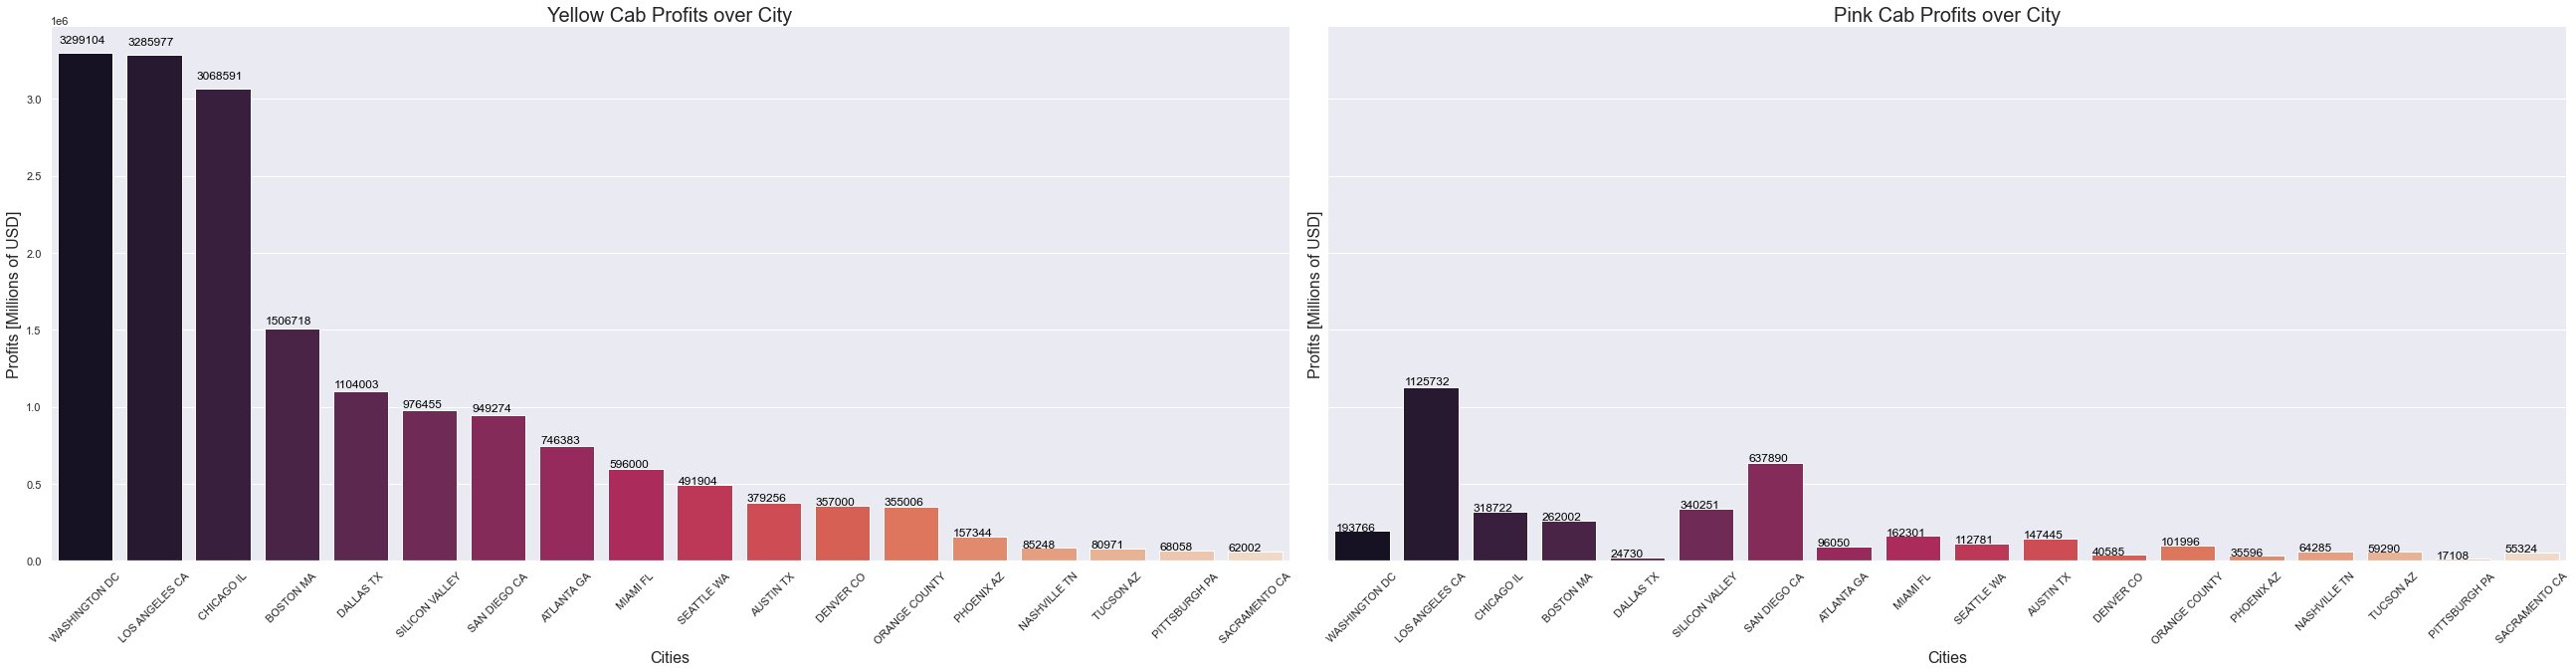

In [254]:
g=sns.catplot('City','Profit Over City',data=h,kind='bar',palette = 'rocket',col='Company', height=8.27, aspect=18/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab Profits over City',fontsize=20)
plt.xticks(rotation=45)
ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Pink Cab Profits over City',fontsize=20)
plt.xticks(rotation=45)
plt.show()

In this picture New York has been removed from both companies to get a better sight of the Profits over the other cities.

We can conclude that YellowCab has greater marketshare in every City

Demand Agewise

In [266]:
c1=masterdata[(masterdata['Age']>18) & (masterdata['Age']<25)]
c2=masterdata[(masterdata['Age']>26) & (masterdata['Age']<40)]
c3=masterdata[(masterdata['Age']>41) & (masterdata['Age']<60)]
c4=masterdata[(masterdata['Age']>60)]

a11= c1.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a11.columns=['Total Customers']
a11=a11.reset_index(level='Year of Travel', col_level=1)
a11=a11.reset_index(level='Company', col_level=1)
a11['Class']= '18-25'
a22= c2.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a22.columns=['Total Customers']
a22=a22.reset_index(level='Year of Travel', col_level=1)
a22=a22.reset_index(level='Company', col_level=1)
a22['Class']= '26-40'
a33= c3.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a33.columns=['Total Customers']
a33=a33.reset_index(level='Year of Travel', col_level=1)
a33=a33.reset_index(level='Company', col_level=1)
a33['Class']= '40-60'
a44= c4.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a44.columns=['Total Customers']
a44=a44.reset_index(level='Year of Travel', col_level=1)
a44=a44.reset_index(level='Company', col_level=1)
a44['Class']= '60+'

agegroup=a11
agegroup=pd.concat([agegroup,a22,a33,a44])
agegroup['Total Customers']=agegroup['Total Customers'].astype(int)
agegroup.head(5)

,Company,Year of Travel,Total Customers,Class
0,Pink Cab,2016,4885,18-25
1,Pink Cab,2017,5985,18-25
2,Pink Cab,2018,5760,18-25
3,Yellow Cab,2016,16196,18-25
4,Yellow Cab,2017,19174,18-25


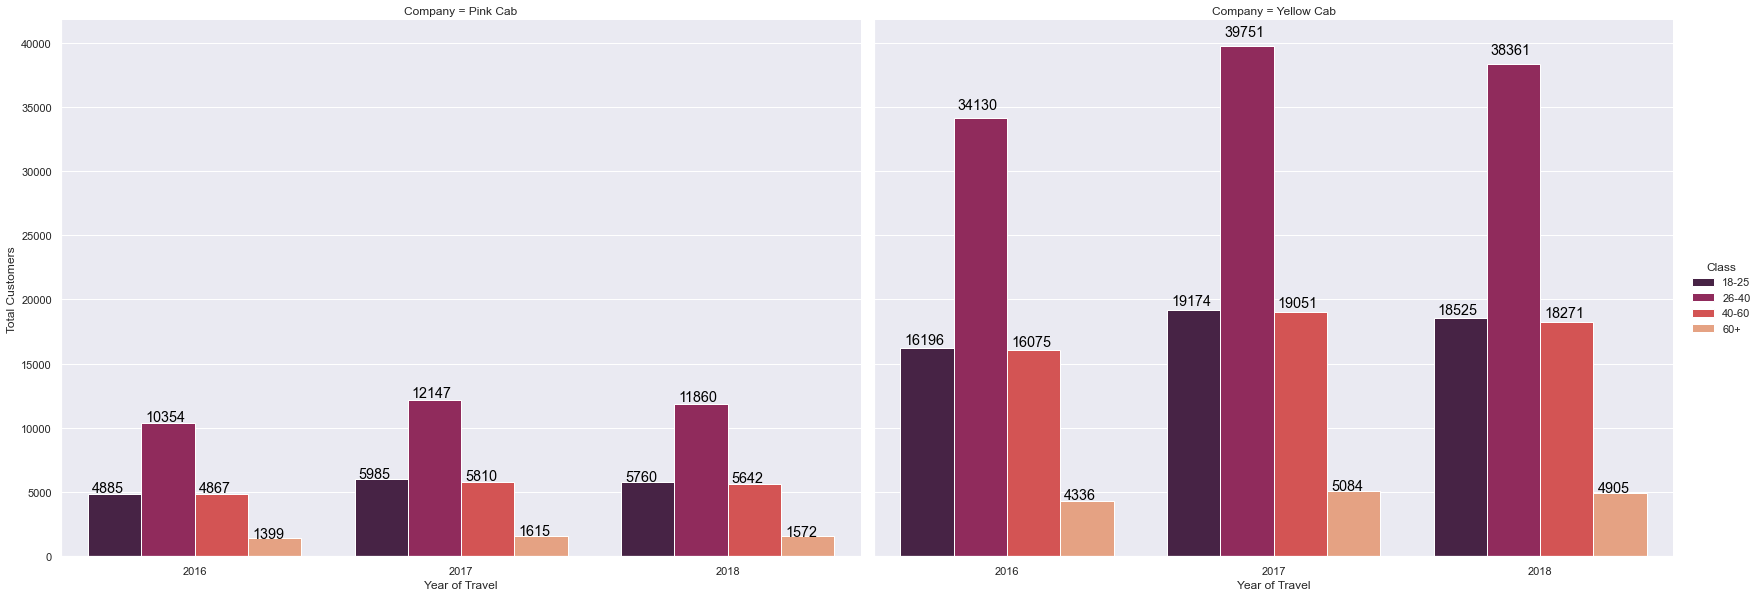

In [267]:
g=sns.catplot('Year of Travel','Total Customers',data=agegroup,col= 'Company',kind='bar',hue='Class',palette = 'rocket', height=8.27, aspect=11.7/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.show()

In [268]:
b=agegroup.groupby(['Company', 'Year of Travel'])['Total Customers'].sum().to_frame('Total')

In [269]:
b.head(6)

Total
Company    Year of Travel       
Pink Cab   2016            21505
           2017            25557
           2018            24834
Yellow Cab 2016            70737
           2017            83060
           2018            80062